In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime as dt


In [2]:
path = "..\..\data\DEFRA\csv\DEFRA_10Y_Daily.csv"
df = pd.read_csv(path,parse_dates=True,skiprows=3)

In [3]:
#gets the name/location of each sensor
sensorkeys = []
for col in df.columns:
    if "Birmingham" in col:
       sensorkeys.append((str(col)))

df = pd.read_csv(path,parse_dates=True,skiprows=4,low_memory=False)

In [4]:
#df.replace('No data', np.nan, inplace=True)
df = df[:-4]

df['DateTime']= pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('DateTime',inplace=True)
df.drop(['Date'], axis=1,inplace=True)


In [5]:
columns = df.columns.to_list()
tempdf = df.filter(columns[:12])
tempdf2 = df.filter(columns[12:24])
tempdf3 = df.filter(columns[24:])

tempdf3.columns = tempdf2.columns = tempdf.columns

In [6]:
df = pd.DataFrame #intialise empty dataframe

#put each sensor data list into one concatenated dataframe
#df = pd.concat([tempdf,tempdf2,tempdf3], keys= sensorkeys)

#only get A4450 and Ladywood 
sensorkeys = sensorkeys[0],sensorkeys[2]
df = pd.concat([tempdf,tempdf2], keys= sensorkeys)

In [7]:
# dropping status columns (these columns just contain the unit of measure)
unitsList = []
for col in df.columns:
    if "Status" in col:
        unitsList.append(df[col][-1])
        df.drop(col,axis=1,inplace=True)

# #replace strings for Null values with NaN 
df.replace("No data", np.nan, inplace=True)

# #turn all data dtypes to numeric 
df = df.apply(pd.to_numeric)

columns = []
for i in range(len(df.columns)):
    col = df.columns[i]
    columns.append(col + " [" + unitsList[i] + "]")

#renaming the columns with the units of measure
df.columns = columns

#sort the datafarame index by datetime
df.dropna(inplace=True)
df.sort_index(inplace=True)

# Time Series graphs

In [8]:
import plotly.express as px
import plotly.graph_objects as go

In [9]:
def createFigure(col,dft,keys):
    # Create figure
    fig = go.Figure()

    #look for each sensor data by its key
    for key in keys:
        df_t = dft.loc[str(key)]
        fig.add_trace(go.Scatter(x=list(df_t.index), y=list(df_t[col]), name= str(key)))

    # Set title
    fig.update_layout(
        title_text="Time series for %s measurements from DEFRA" % (col)
    )

    # Add range slider
    fig.update_layout(
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                        label="1d",
                        step="day",
                        stepmode="backward"),
                    dict(count=7,
                        label="1w",
                        step="day",
                        stepmode="backward"),
                    dict(step="all")
                ])
            ),
            rangeslider=dict(
                visible=True
            ),
            type="date"
        ),
        yaxis=dict(
        autorange = True,
        fixedrange= False
        )
    )

    #fig.show()

    directory = "..\..\data\DEFRA\html\Daily\%s.html" % (col)
    fig.write_html(directory) 

In [10]:
for col in df.columns:
    createFigure(col,df,sensorkeys)

# Correlations in data

In [11]:
tempdf = df.loc[sensorkeys[0]]
tempdf = tempdf.apply(pd.to_numeric)
cor = tempdf.corr()

([<matplotlib.axis.XTick at 0x279781121c0>,
 [Text(0, 1, 'Ozone [N ugm-3]'),
  Text(1, 1, 'Nitric oxide [N ugm-3]'),
  Text(2, 1, 'Nitrogen dioxide [N ugm-3]'),
  Text(3, 1, 'Nitrogen oxides as nitrogen dioxide [N ugm-3]'),
  Text(4, 1, 'PM10 particulate matter (Hourly measured) [N ugm-3 (FIDAS)]'),
  Text(5, 1, 'PM2.5 particulate matter (Hourly measured) [N ugm-3 (Ref.eq)]')])

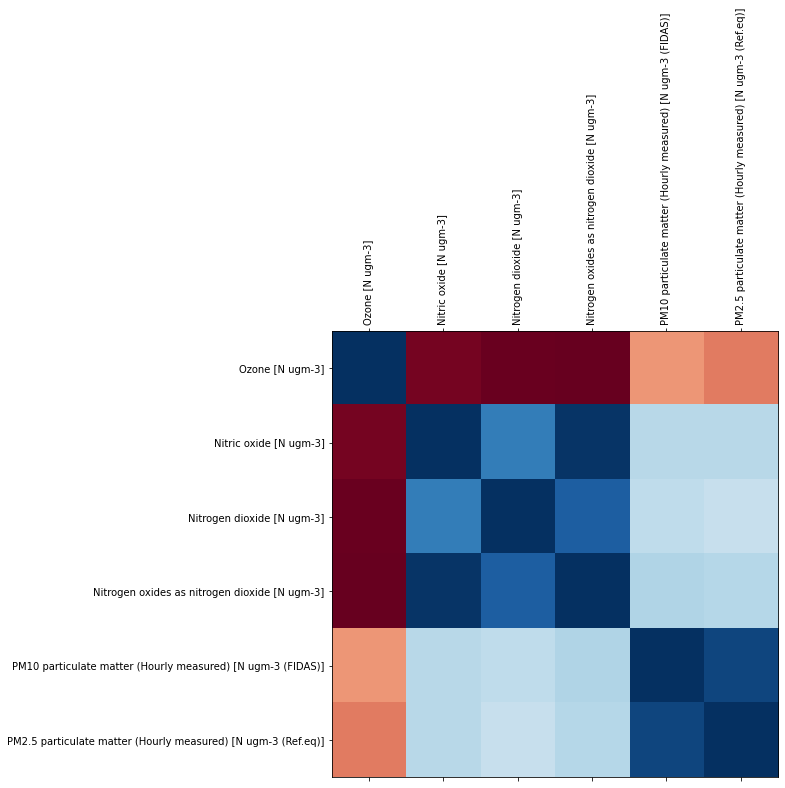

In [12]:
fig = plt.figure(figsize=(8,8))
plt.matshow(cor, cmap = 'RdBu', fignum = fig.number) #red (negative) / blue (postiive)
plt.yticks(range(len(cor.columns)), cor.columns)
plt.xticks(range(len(cor.columns)), cor.columns, rotation = "vertical")

In [13]:
cor

,Ozone [N ugm-3],Nitric oxide [N ugm-3],Nitrogen dioxide [N ugm-3],Nitrogen oxides as nitrogen dioxide [N ugm-3],PM10 particulate matter (Hourly measured) [N ugm-3 (FIDAS)],PM2.5 particulate matter (Hourly measured) [N ugm-3 (Ref.eq)]
Ozone [N ugm-3],1.000000,-0.595021,-0.624996,-0.633210,-0.178968,-0.241230
Nitric oxide [N ugm-3],-0.595021,1.000000,0.751105,0.984434,0.412118,0.407646
Nitrogen dioxide [N ugm-3],-0.624996,0.751105,1.000000,0.855155,0.390568,0.372049
Nitrogen oxides as nitrogen dioxide [N ugm-3],-0.633210,0.984434,0.855155,1.000000,0.427245,0.419012
PM10 particulate matter (Hourly measured) [N ugm-3 (FIDAS)],-0.178968,0.412118,0.390568,0.427245,1.000000,0.935885
PM2.5 particulate matter (Hourly measured) [N ugm-3 (Ref.eq)],-0.241230,0.407646,0.372049,0.419012,0.935885,1.000000


In [14]:
# Create figure
fig = go.Figure()


df_t = df.loc[sensorkeys[0]]
fig.add_trace(go.Scatter(x=list(df_t.index), y=list(df_t['Ozone [N ugm-3]']), name= str(sensorkeys[0]) + 'Ozone [V ugm-3]'))
fig.add_trace(go.Scatter(x=list(df_t.index), y=list(df_t['Nitrogen dioxide [N ugm-3]']), name= str(sensorkeys[0]) + 'Nitrogen dioxide [V ugm-3]'))

# Set title
fig.update_layout(
    title_text="Time series for Ozone and NO2 measurements from DEFRA"
)

# Add range slider
fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                    label="1d",
                    step="day",
                    stepmode="backward"),
                dict(count=7,
                    label="1w",
                    step="day",
                    stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    ),
    yaxis=dict(
    autorange = True,
    fixedrange= False
    )
)

fig.show()

In [15]:

# fig, ax = plt.subplots(figsize = (32,32))
# ax.scatter(df_t["Ozone [V ugm-3]"],df_t["Nitrogen dioxide [V ugm-3]"])
# ax.set_ylabel("NO2")
# ax.set_xlabel("Ozone")
# plt.show()
